In [1]:
# 📊 Exploratory Data Analysis – Gender-Based Strength Comparison in Powerlifting

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# --------------------------------------
# 📁 Load and preview data
# --------------------------------------

In [4]:
df = pd.read_csv("../data/sample_data.csv", low_memory=False)

In [5]:
# --------------------------------------
# 🧭 Basic Age Distribution Overview
# --------------------------------------

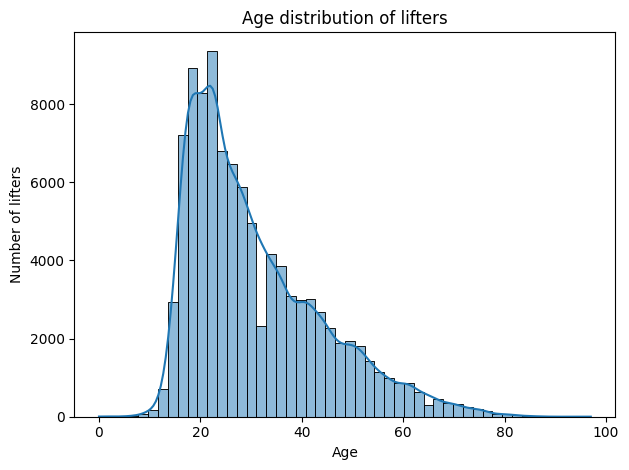

In [8]:
sns.histplot(df['Age'].dropna(), bins=50, kde=True)
plt.title("Age distribution of lifters")
plt.xlabel("Age")
plt.ylabel("Number of lifters")
plt.tight_layout()
plt.savefig("../figures/age_distribution.png")
plt.show()

In [9]:
# --------------------------------------
# 📈 Gender-based Scores Over Time (Dots, Wilks, Glossbrenner)
# --------------------------------------

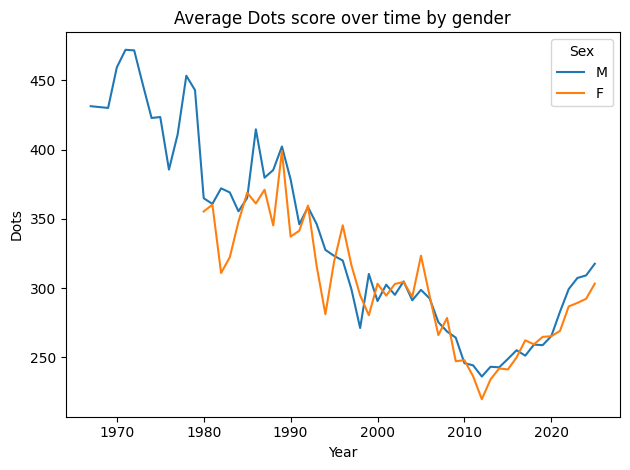

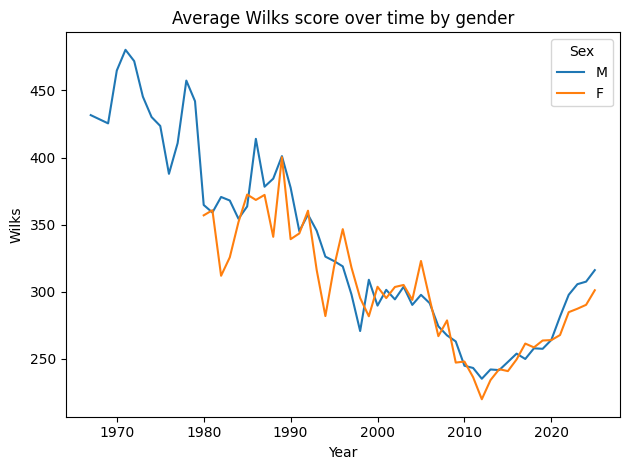

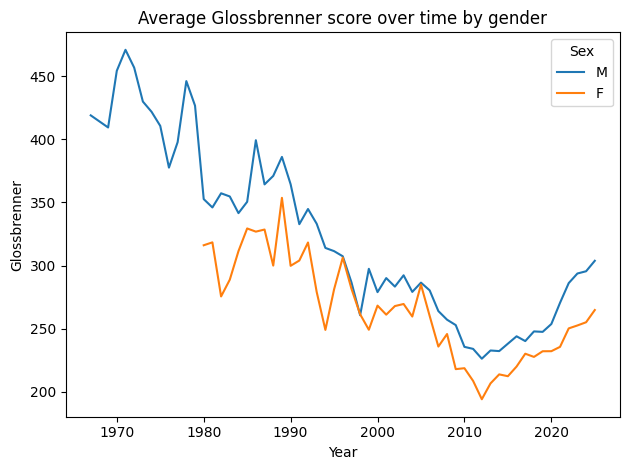

In [11]:
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
scores = ['Dots', 'Wilks', 'Glossbrenner']
for score in scores:
    grouped = df.groupby(['Year', 'Sex'])[score].mean().reset_index()
    sns.lineplot(data=grouped, x='Year', y=score, hue='Sex')
    plt.title(f"Average {score} score over time by gender")
    plt.tight_layout()
    plt.savefig(f"../figures/{score.lower()}_trend_by_gender.png")
    plt.show()


In [12]:
# --------------------------------------
# 🔍 Comparison of Score Types per Gender
# --------------------------------------

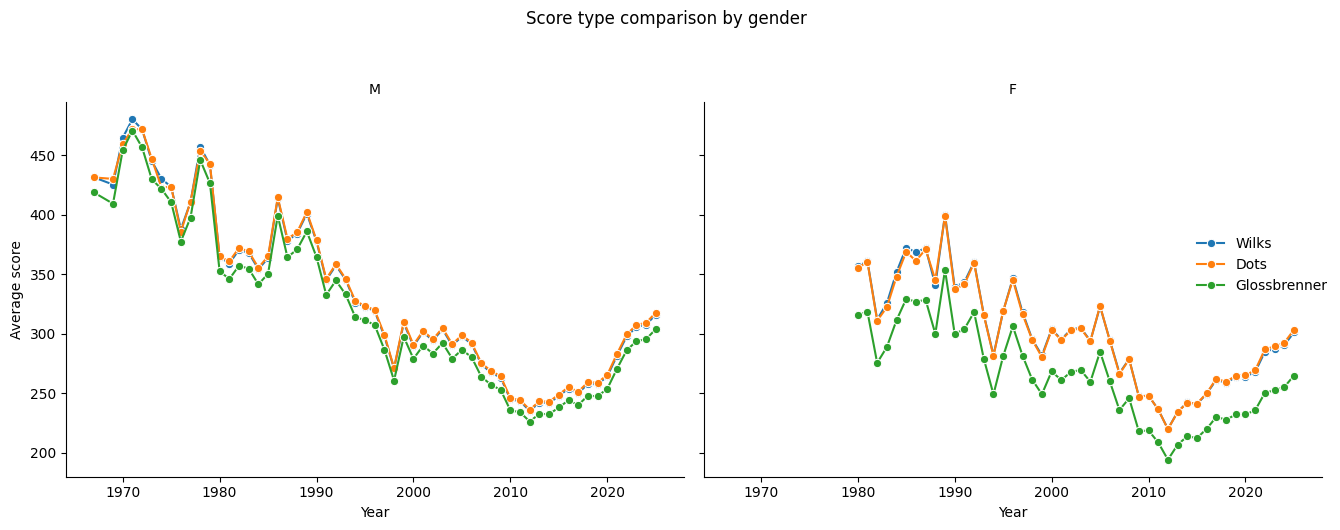

In [13]:
grouped = df.groupby(['Year', 'Sex'])[['Dots', 'Wilks', 'Glossbrenner']].mean().reset_index()
melted = grouped.melt(id_vars=['Year', 'Sex'], value_vars=['Wilks', 'Dots', 'Glossbrenner'],
                      var_name='ScoreType', value_name='AvgScore')
g = sns.FacetGrid(data=melted, col='Sex', height=5, aspect=1.2)
g.map_dataframe(sns.lineplot, x="Year", y="AvgScore", hue="ScoreType", marker="o")
g.add_legend()
g.set_axis_labels("Year", "Average score")
g.set_titles("{col_name}")
plt.suptitle("Score type comparison by gender", y=1.05)
plt.tight_layout()
plt.savefig("../figures/score_type_facet_by_gender.png")
plt.show()

In [14]:
# --------------------------------------
# 🏋️ Strength by Weight Class (Raw Only)
# --------------------------------------

C:\Users\karol\AppData\Local\Temp\ipykernel_11960\581001706.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['WeightClassKg_clean'] = df_raw['WeightClassKg'].astype(str).apply(parse_weight_class)
C:\Users\karol\AppData\Local\Temp\ipykernel_11960\581001706.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['WeightCategory'] = pd.cut(df_raw['WeightClassKg_clean'], bins=bins, labels=labels, right=False)


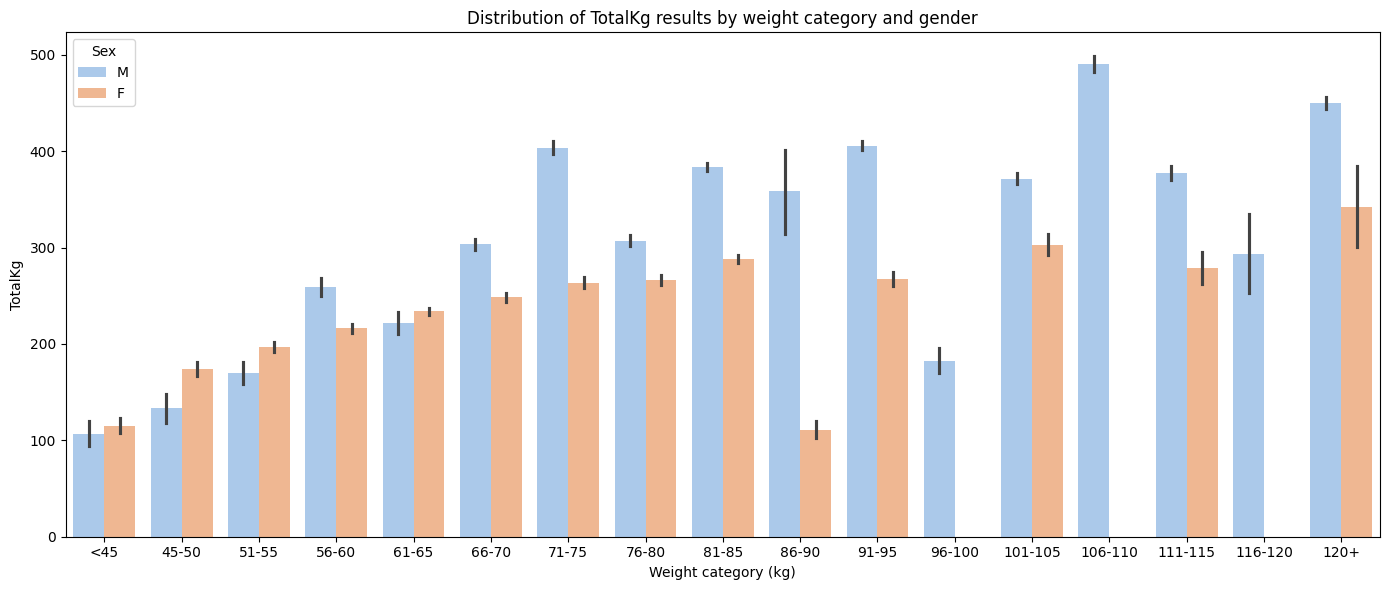

In [15]:
df_raw = df[df['Equipment'] == 'Raw']

def parse_weight_class(val):
    try:
        return float(val.replace('+', '').replace('-', '-'))
    except:
        return np.nan

# Clean weight class
df_raw['WeightClassKg_clean'] = df_raw['WeightClassKg'].astype(str).apply(parse_weight_class)
bins = [0, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 200]
labels = ['<45', '45-50' , '51-55', '56-60', '61-65', '66-70', '71-75', '76-80',
          '81-85', '86-90', '91-95', '96-100', '101-105', '106-110', '111-115', '116-120', '120+']
df_raw['WeightCategory'] = pd.cut(df_raw['WeightClassKg_clean'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_raw, x='WeightCategory', y='TotalKg', hue='Sex', palette='pastel')
plt.title("Distribution of TotalKg results by weight category and gender")
plt.xlabel("Weight category (kg)")
plt.ylabel("TotalKg")
plt.legend(title="Sex")
plt.tight_layout()
plt.savefig("../figures/totalkg_by_weight_category.png")
plt.show()

In [16]:
# --------------------------------------
# 🔢 Percentage Score Difference per Attempt Type
# --------------------------------------

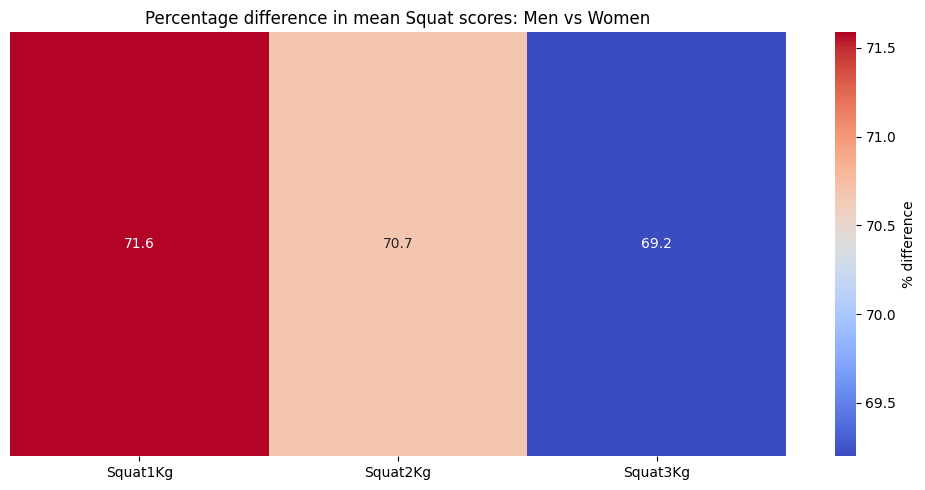

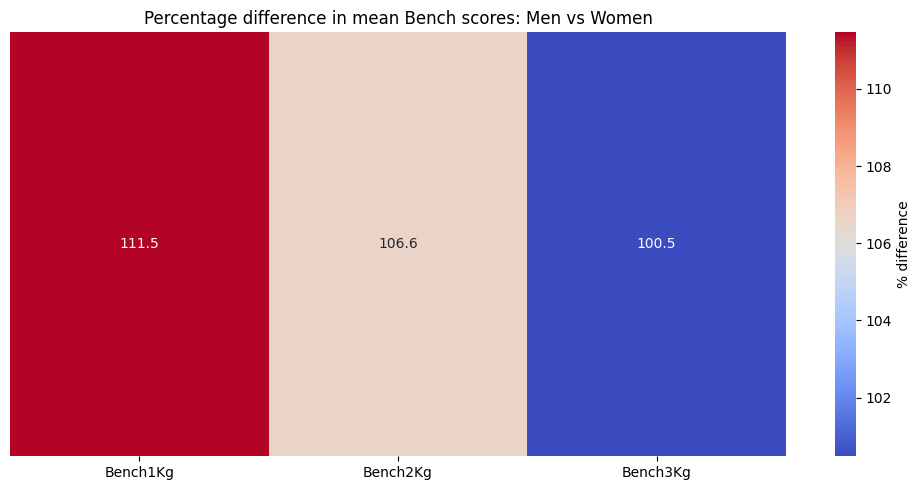

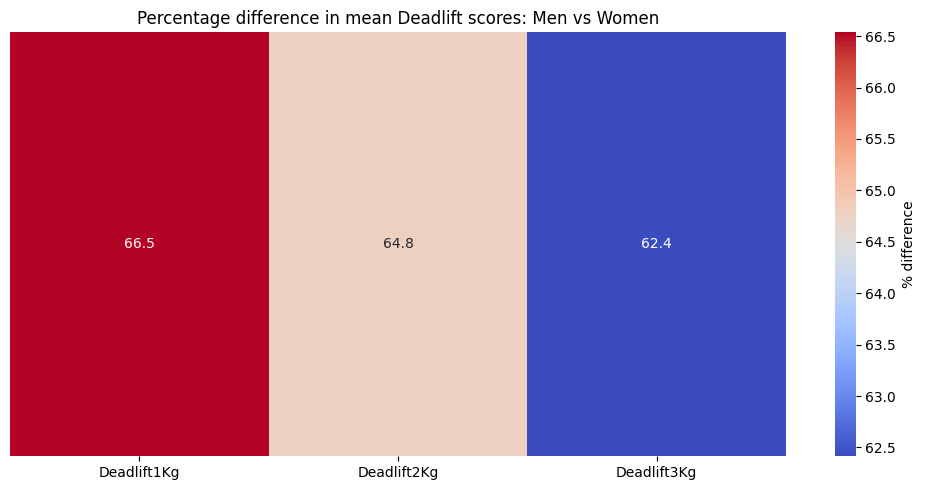

In [19]:
exercises = [['Squat1Kg', 'Squat2Kg', 'Squat3Kg'],
             ['Bench1Kg', 'Bench2Kg', 'Bench3Kg'],
             ['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']]

for exercise in exercises:
    mean_exercise = df_raw.groupby('Sex')[exercise].mean()
    pct_diff = (mean_exercise.loc['M'] - mean_exercise.loc['F']) / mean_exercise.loc['F'] * 100
    plt.figure(figsize=(10,5))
    sns.heatmap(pct_diff.to_frame().T, annot=True, cmap='coolwarm', fmt='.1f',
                cbar_kws={'label': '% difference'})
    plt.title(f'Percentage difference in mean {exercise[0][:-3]} scores: Men vs Women')
    plt.yticks([])
    plt.tight_layout()
    plt.savefig(f"../figures/{exercise[0][:-3].lower()}_pct_diff.png")
    plt.show()

In [20]:
# --------------------------------------
# 📏 Standard Deviation by Gender and Attempt
# --------------------------------------

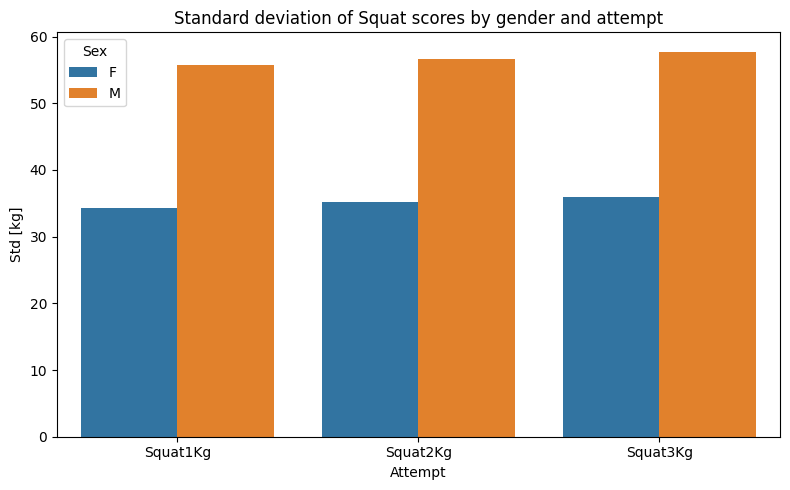

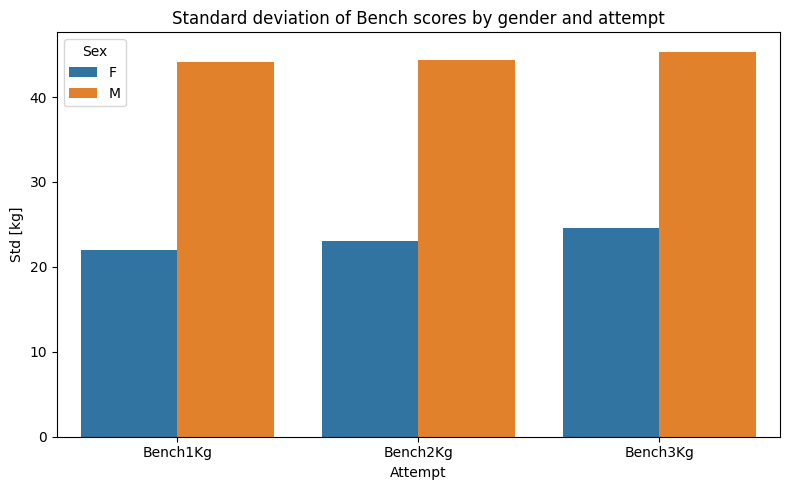

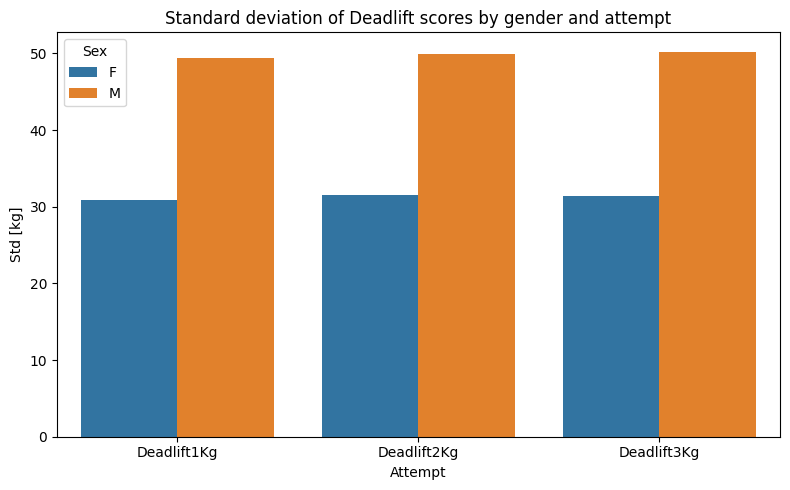

In [22]:
for exercise in exercises:
    std_df = df.groupby('Sex')[exercise].std()
    std_melted = std_df.reset_index().melt(id_vars='Sex', var_name='Attempt', value_name='StdDev')
    plt.figure(figsize=(8,5))
    sns.barplot(data=std_melted, x='Attempt', y='StdDev', hue='Sex')
    plt.title(f'Standard deviation of {exercise[0][:-3]} scores by gender and attempt')
    plt.ylabel('Std [kg]')
    plt.tight_layout()
    plt.savefig(f"../figures/{exercise[0][:-3].lower()}_std_by_sex.png")
    plt.show()

In [23]:
# --------------------------------------
# ✅ Success Rate of Attempts by Gender
# --------------------------------------

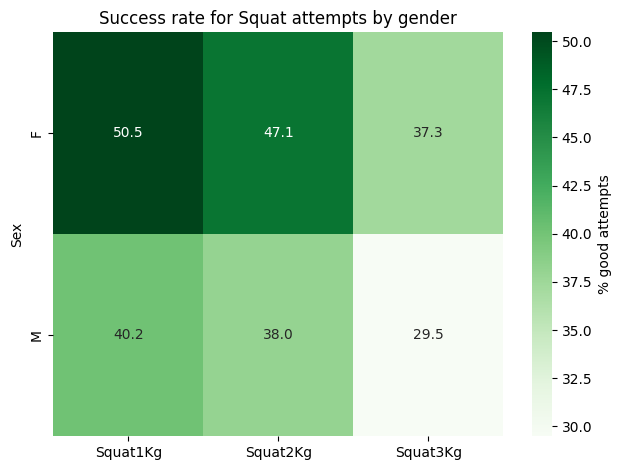

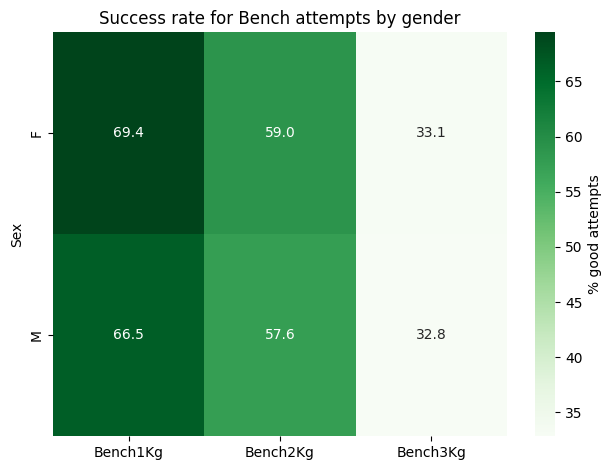

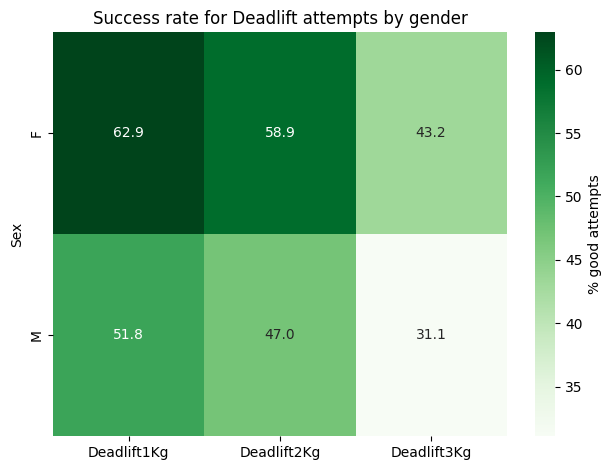

In [24]:
for exercise in exercises:
    success_rate = df_raw.groupby('Sex')[exercise].apply(lambda x: x.notna().mean() * 100)
    sns.heatmap(success_rate, annot=True, fmt='.1f', cmap='Greens', cbar_kws={'label': '% good attempts'})
    plt.title(f"Success rate for {exercise[0][:-3]} attempts by gender")
    plt.tight_layout()
    plt.savefig(f"../figures/{exercise[0][:-3].lower()}_success_rate.png")
    plt.show()

In [25]:
# --------------------------------------
# 💡 Performance Ratio: TotalKg / Bodyweight
# --------------------------------------

C:\Users\karol\AppData\Local\Temp\ipykernel_11960\1097685563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['TotalKg_per_BodyweightKg'] = df_raw['TotalKg'] / df_raw['BodyweightKg']
C:\Users\karol\AppData\Local\Temp\ipykernel_11960\1097685563.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_perf = df_raw.groupby(['Sex', 'WeightCategory'])['TotalKg_per_BodyweightKg'].mean().reset_index()


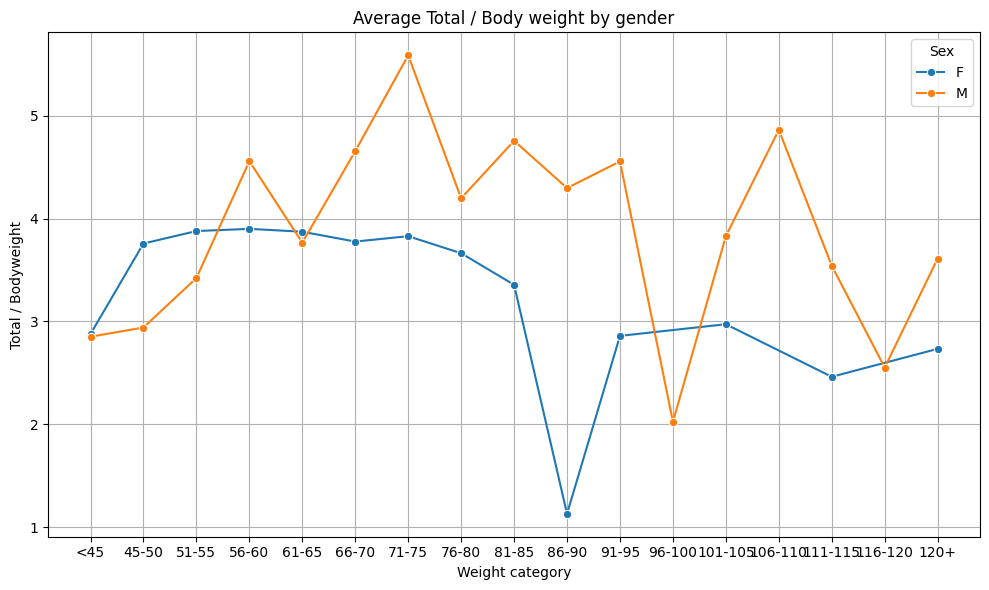

In [26]:
df_raw['TotalKg_per_BodyweightKg'] = df_raw['TotalKg'] / df_raw['BodyweightKg']
mean_perf = df_raw.groupby(['Sex', 'WeightCategory'])['TotalKg_per_BodyweightKg'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_perf, x='WeightCategory', y='TotalKg_per_BodyweightKg', hue='Sex', marker='o')
plt.title('Average Total / Body weight by gender')
plt.xlabel('Weight category')
plt.ylabel('Total / Bodyweight')
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/performance_ratio_by_sex.png")
plt.show()

In [27]:
# --------------------------------------
# 📅 Wilks Score Trend by Gender
# --------------------------------------

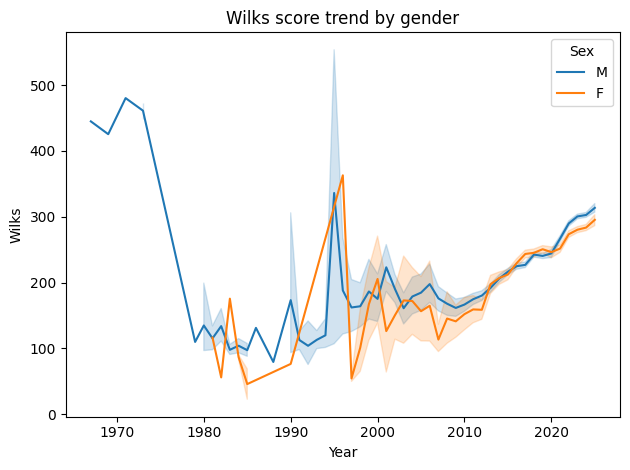

In [28]:
sns.lineplot(data=df_raw, hue='Sex', x='Year', y='Wilks')
plt.title("Wilks score trend by gender")
plt.tight_layout()
plt.savefig("../figures/wilks_trend_by_sex.png")
plt.show()

In [29]:
# --------------------------------------
# 🔗 Correlation Matrix by Gender
# --------------------------------------

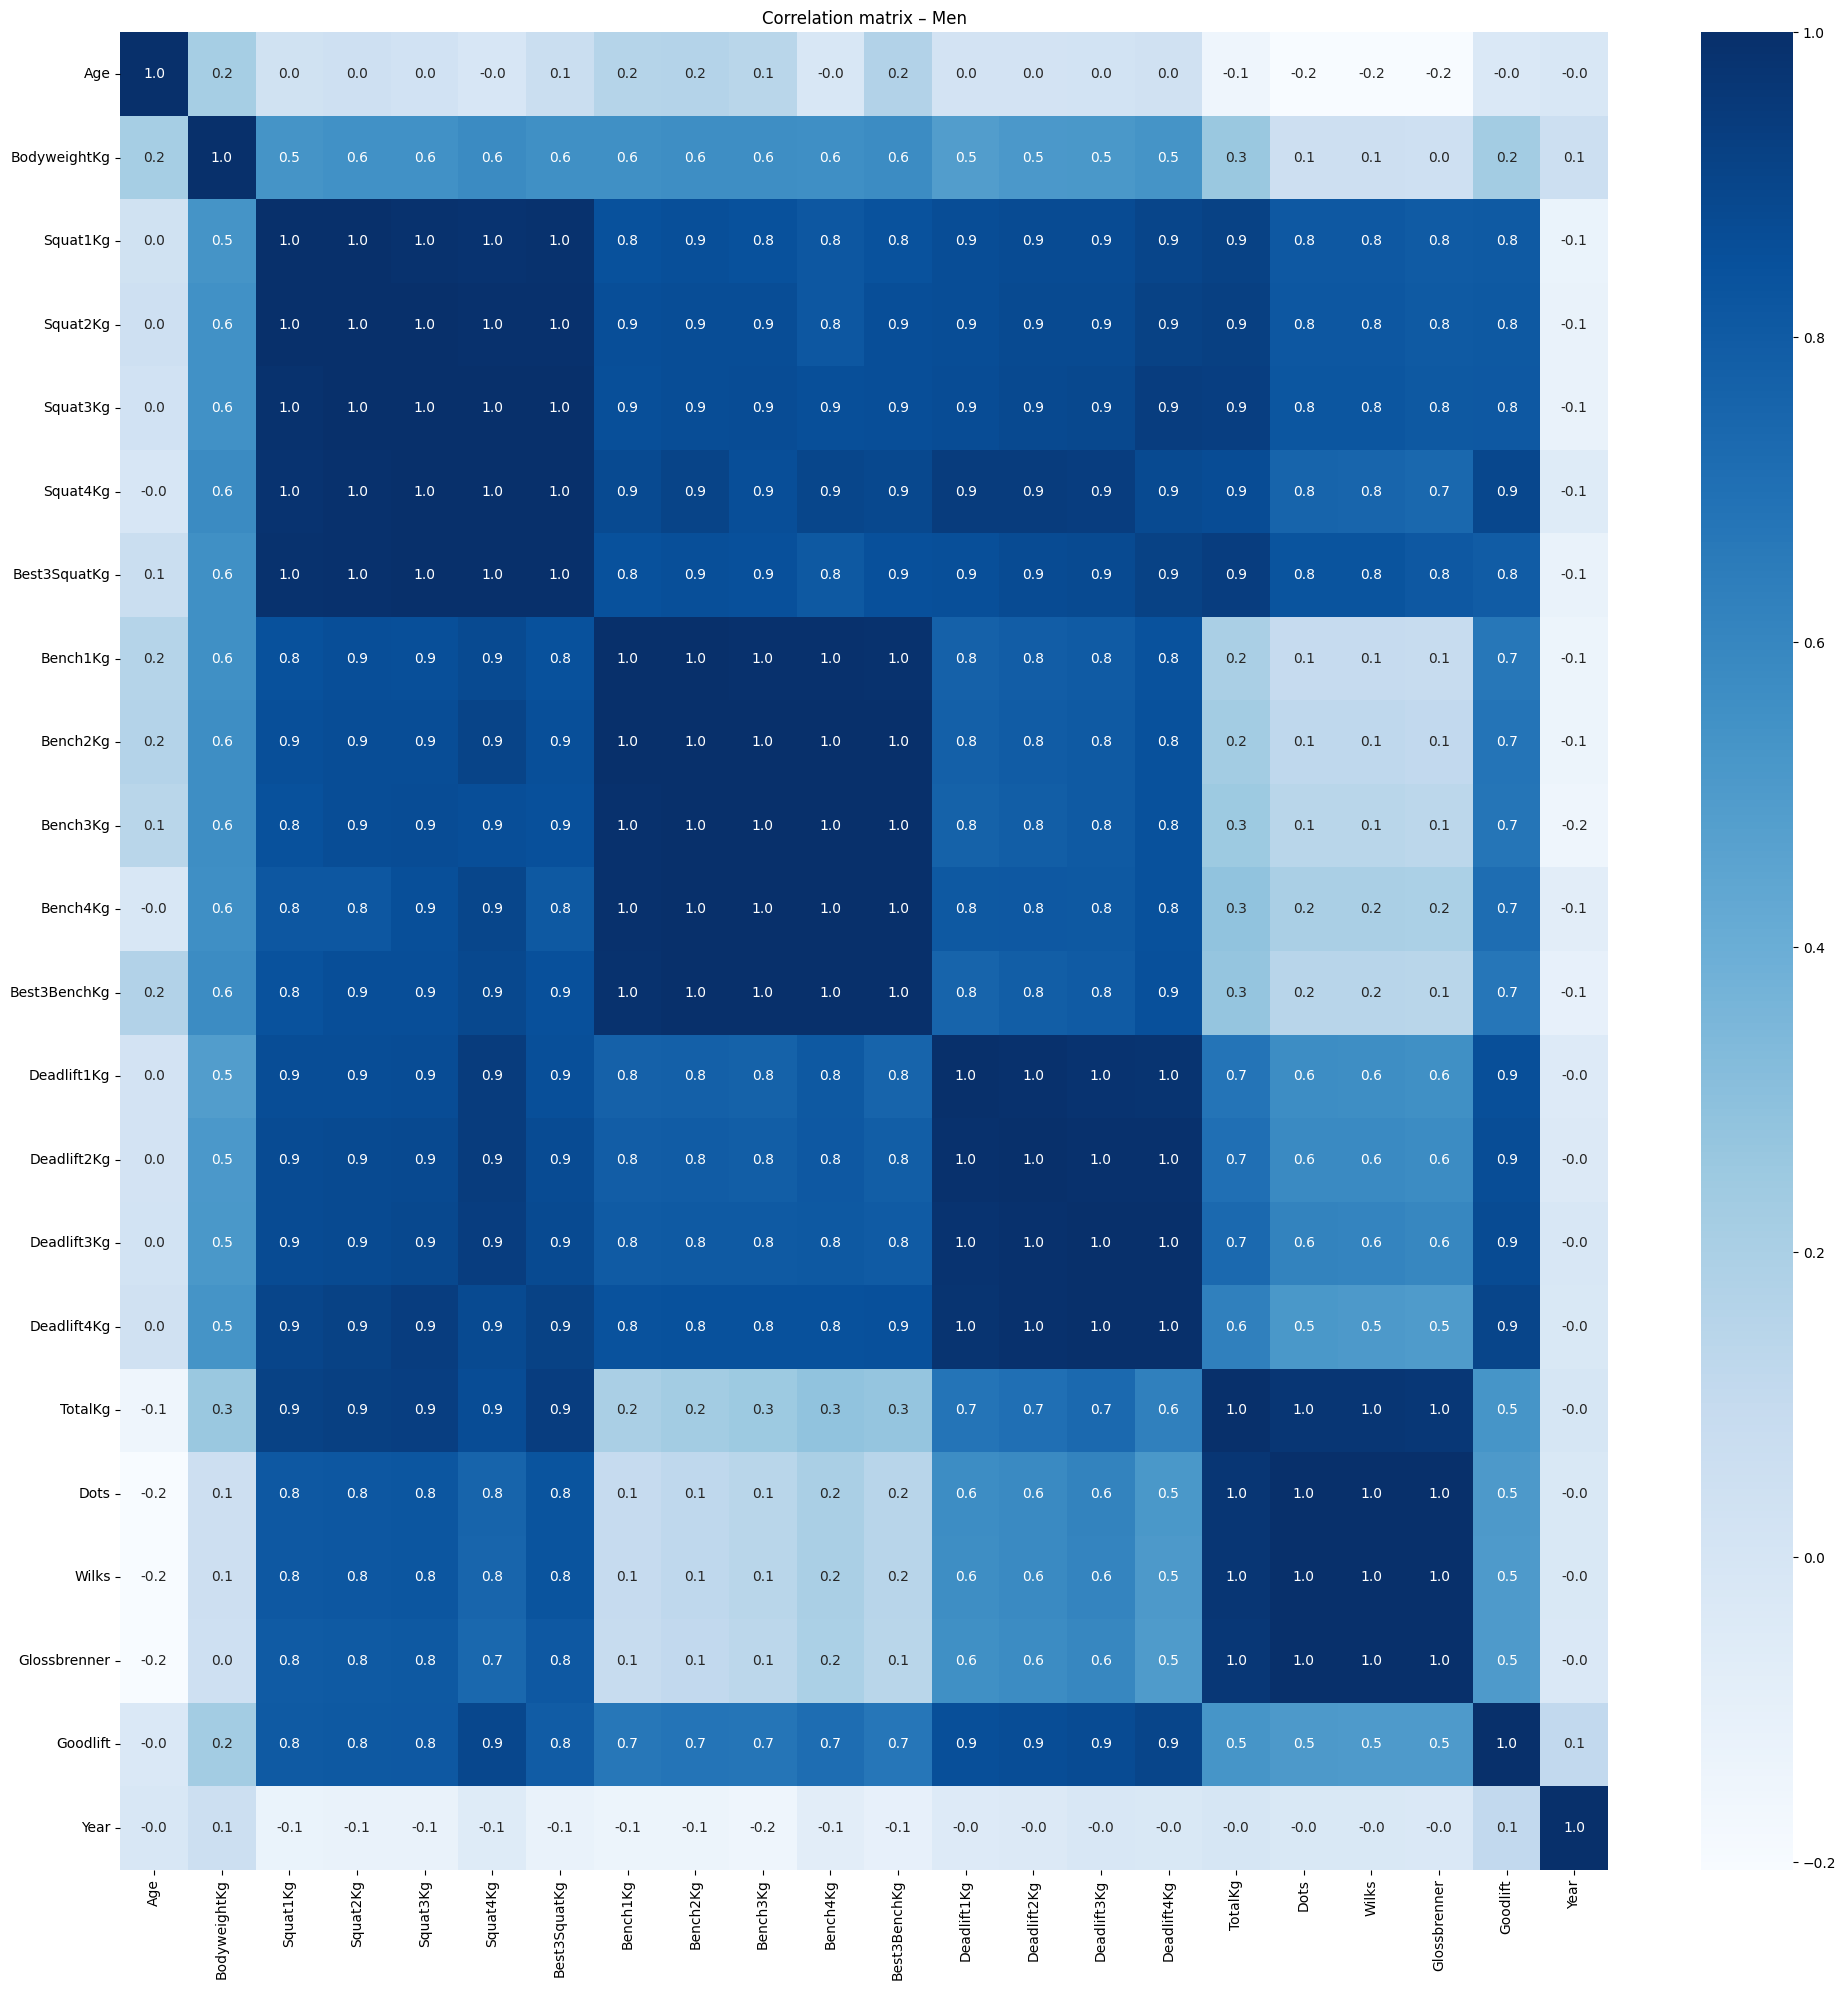

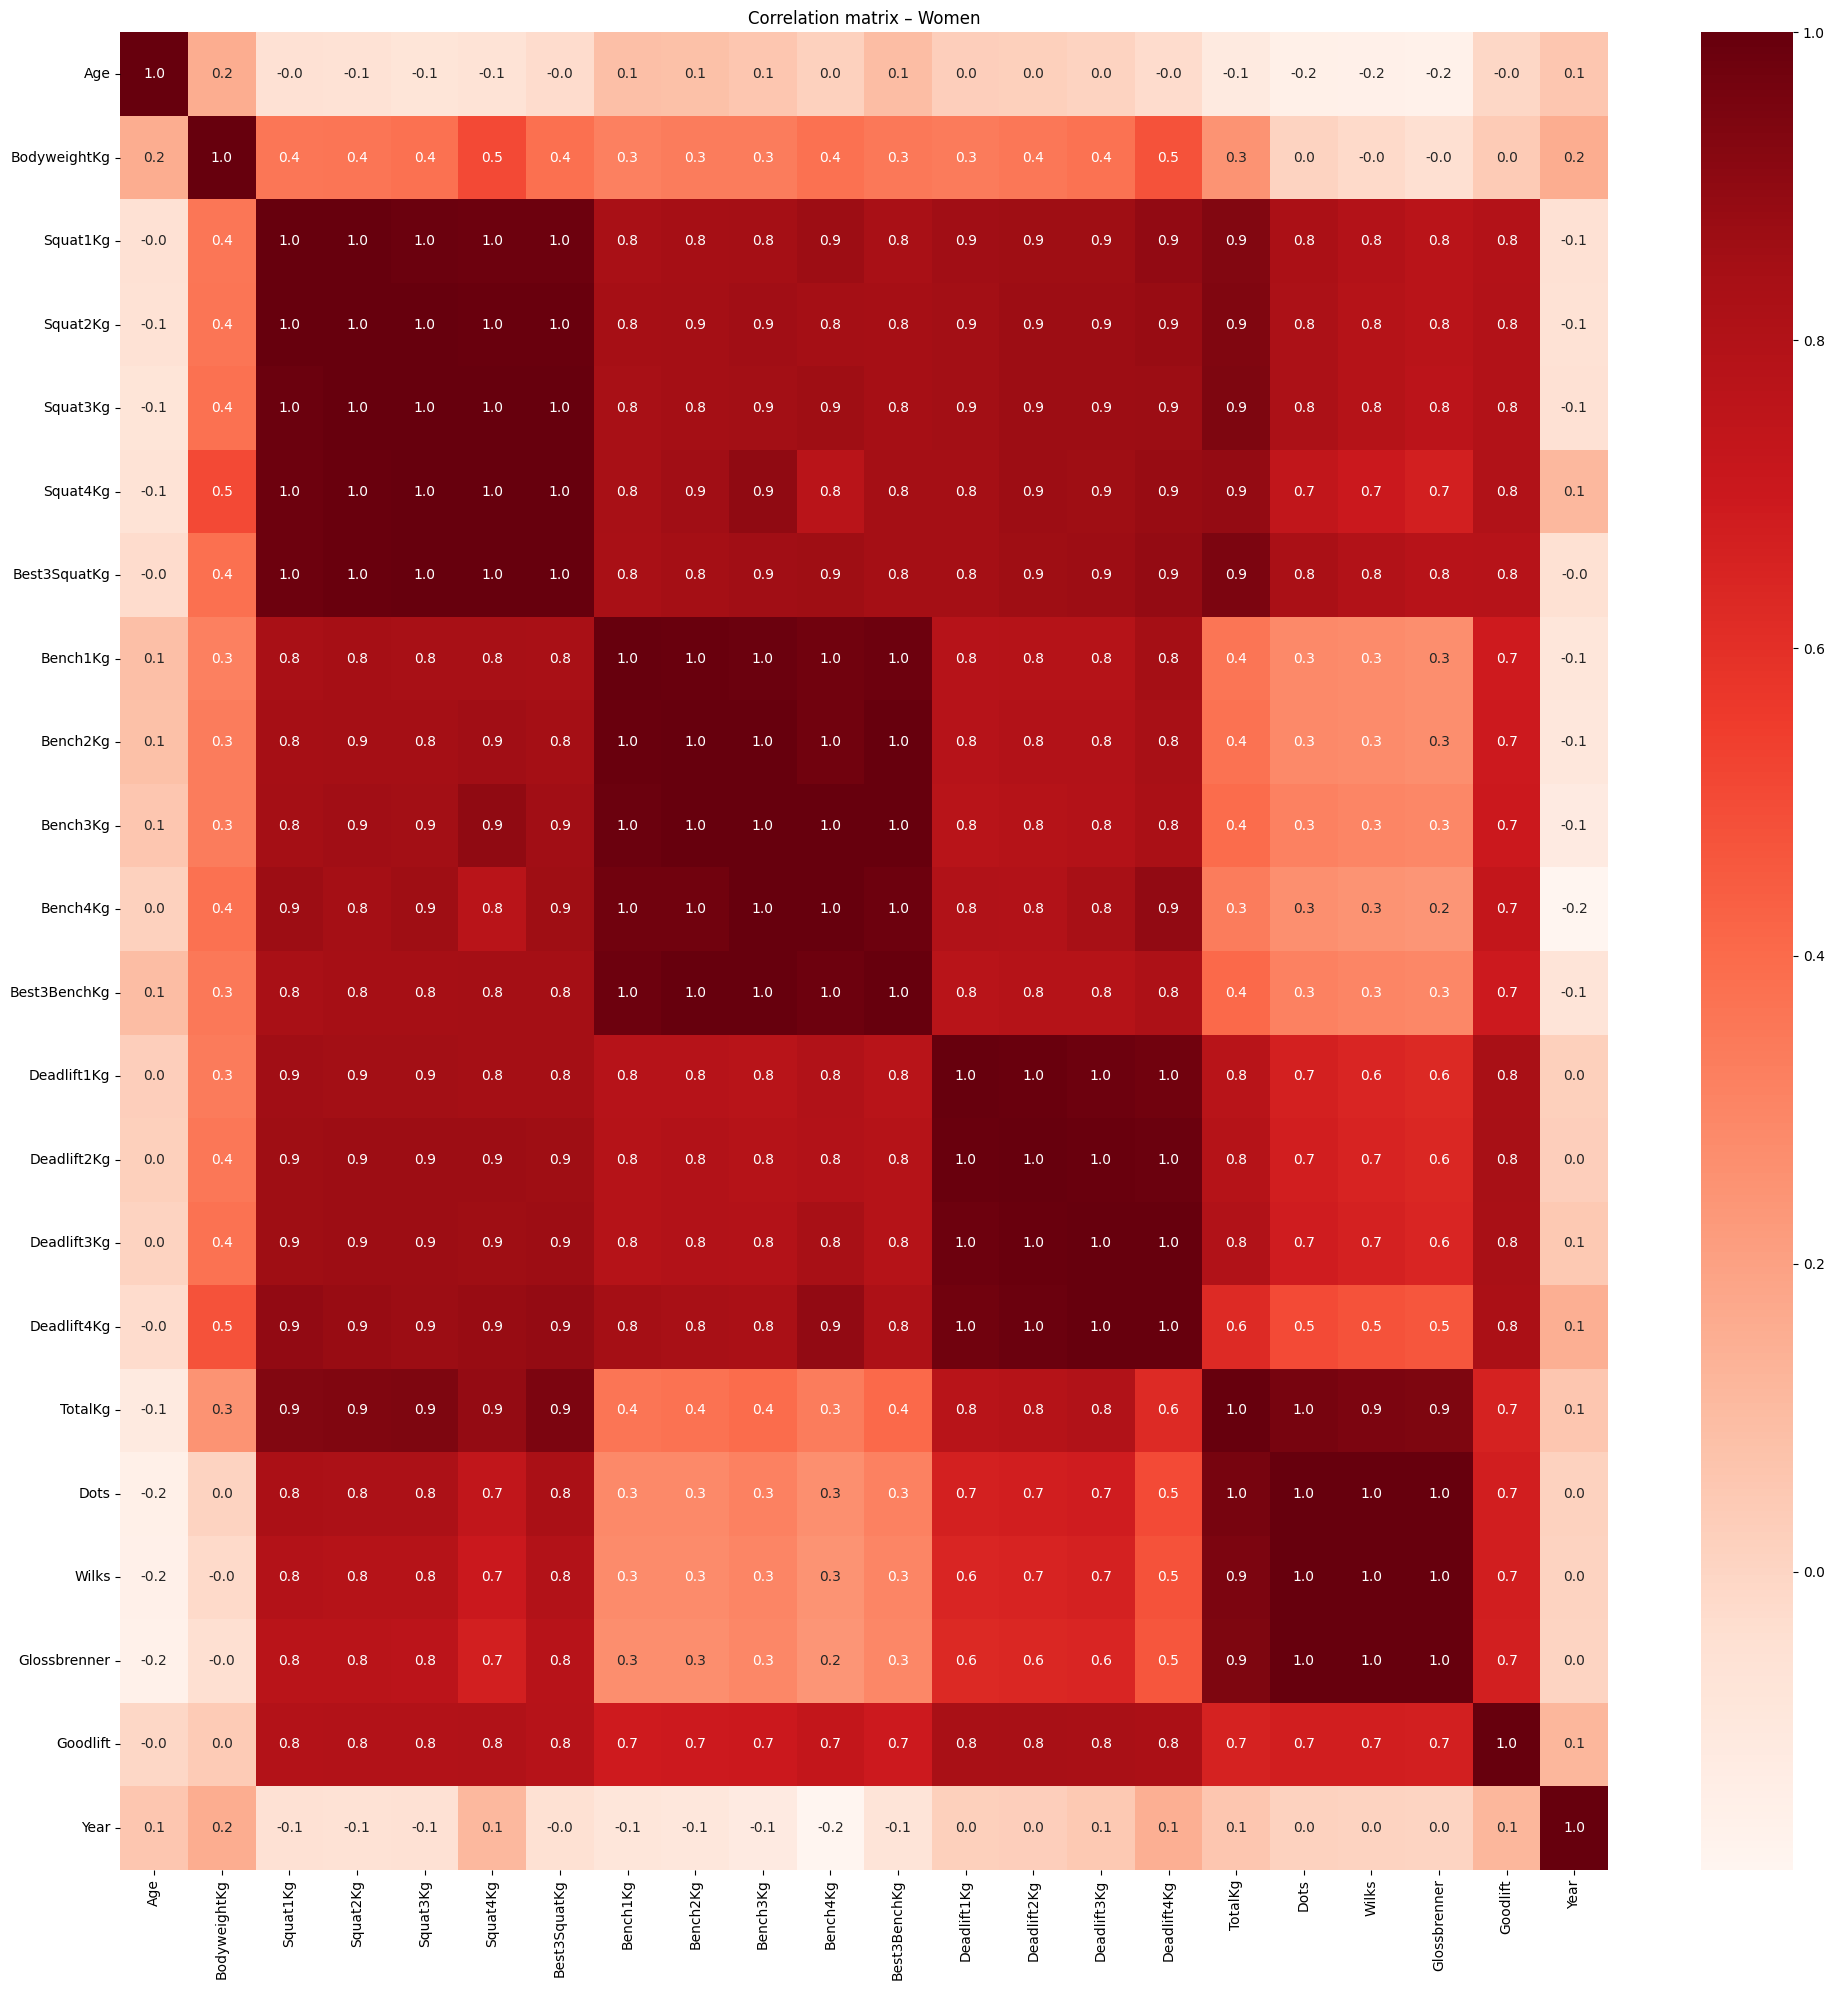

In [35]:
corr_m = df[df['Sex'] == 'M'].corr(numeric_only=True)
corr_f = df[df['Sex'] == 'F'].corr(numeric_only=True)

plt.figure(figsize=(20,20))
sns.heatmap(corr_m, annot=True, fmt='.1f', cmap='Blues')
plt.title("Correlation matrix – Men")
plt.tight_layout()
plt.savefig("../figures/correlation_men.png")
plt.show()

plt.figure(figsize=(20,20))
sns.heatmap(corr_f, annot=True, fmt='.1f', cmap='Reds')
plt.title("Correlation matrix – Women")
plt.tight_layout()
plt.savefig("../figures/correlation_women.png")
plt.show()